<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/SVM_with_others.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


# from sklearn.datasets import make_classification
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from mlxtend.plotting import plot_decision_regions  # —Ç—Ä–µ–±—É–µ—Ç—Å—è —É—Å—Ç–∞–Ω–æ–≤–∫–∞ mlxtend

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# –∑–∞–≥—Ä—É–∂–∞–µ–º –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö
iris = datasets.load_iris()


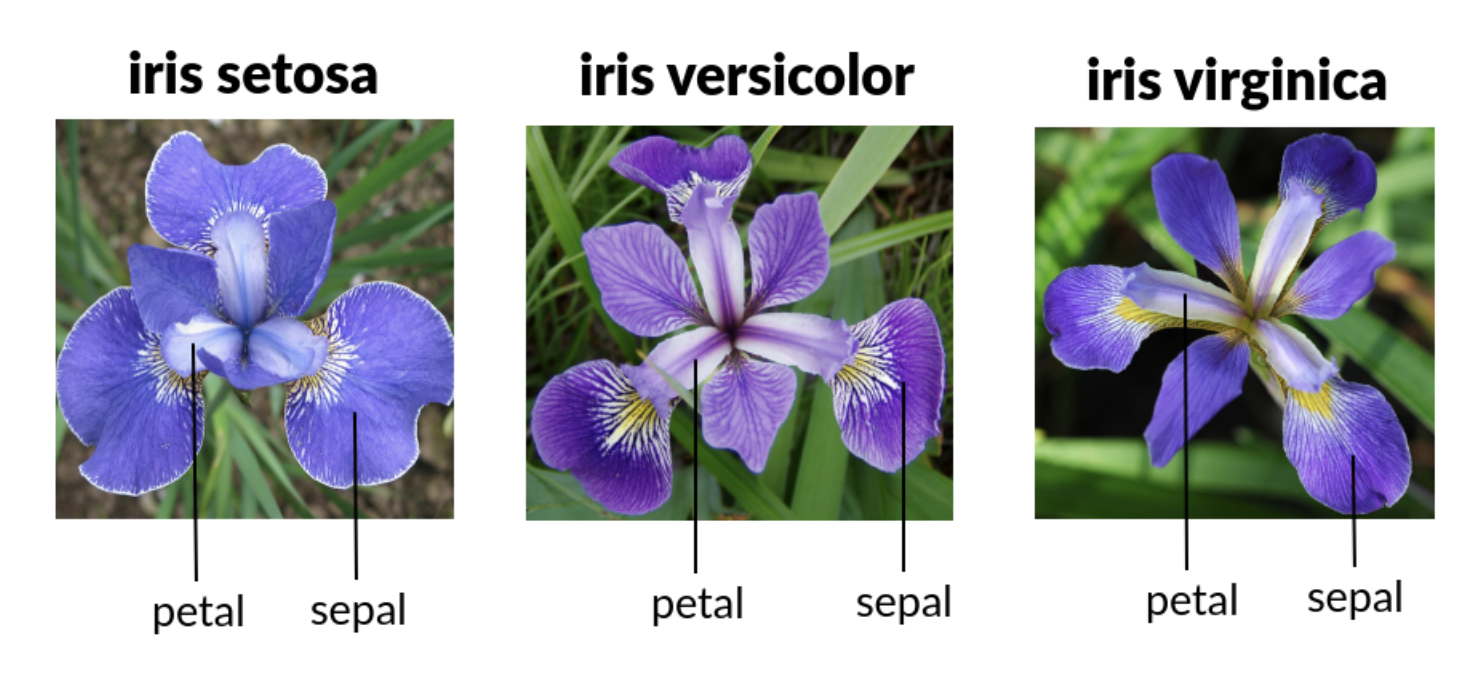

In [ ]:
# –∑–∞–≥—Ä—É–∑–∏–º –¥–∞—Ç–∞—Å–µ—Ç —Å –∏—Ä–∏—Å–∞–º–∏
data = datasets.load_iris()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = data["target"]

#EDA

In [ ]:
# –†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞
print(f"–í –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ –∏—Ä–∏—Å–∞–º: {X.shape[0]} —Å—Ç—Ä–æ–∫")

# Information about columns and data types
print(f"\n –í –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ –∏—Ä–∏—Å–∞–º {X.shape[1]} —Å—Ç–æ–ª–±—Ü–æ–≤, –∏–∑ –Ω–∏—Ö :")
print(X.dtypes.value_counts())

–í –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ –∏—Ä–∏—Å–∞–º: 150 —Å—Ç—Ä–æ–∫

 –í –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ –∏—Ä–∏—Å–∞–º 4 —Å—Ç–æ–ª–±—Ü–æ–≤, –∏–∑ –Ω–∏—Ö :
float64    4
dtype: int64


In [ ]:
print("\n –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
X.describe().T


 –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:


count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

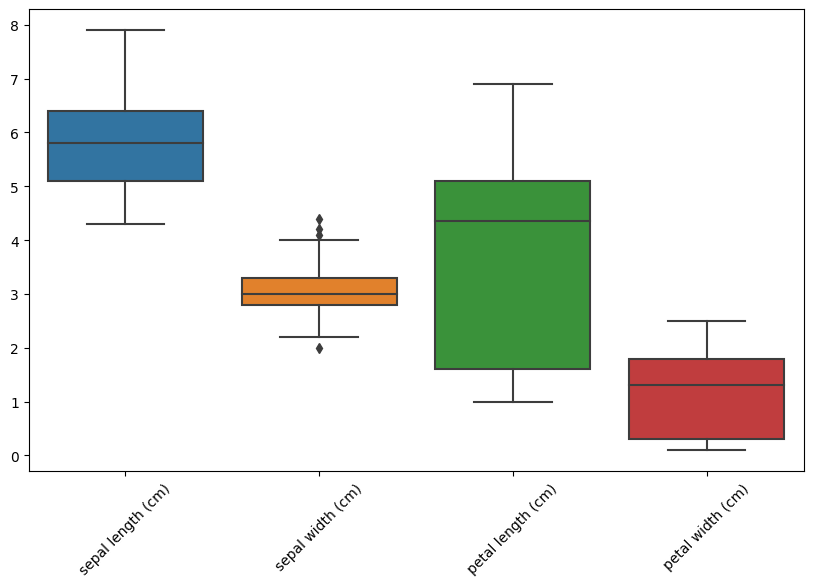

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.show()

**–í—ã–≤–æ–¥ :**
- –î–∞—Ç–∞—Å–µ—Ç –ø–æ –∏—Ä–∏—Å–∞–º –Ω–µ–±–æ–ª—å—à–æ–π, —Å–æ–¥–µ—Ä–∂–∏—Ç 150 —Å—Ç—Ä–æ–∫ –∏ 4 —Å—Ç–æ–ª–±—Ü–∞
- –ü—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç
- –í—ã–±—Ä–æ—Å–æ–≤ –Ω–µ—Ç

In [ ]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π
print("\nTarget Class Distribution:")
pd.Series(y).value_counts()



Target Class Distribution:


0    50
1    50
2    50
dtype: int64

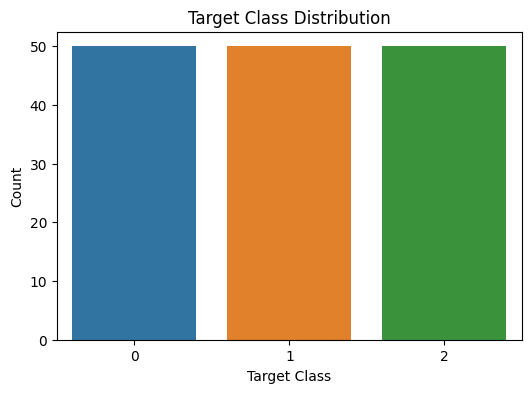

In [ ]:
# Bar plot for target class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=pd.Series(y))
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

**–í—ã–≤–æ–¥:**

–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Ä–∞—Å–ø—Ä–æ–¥–µ–ª–µ–Ω–∞ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ , –∫–∞–∂–¥—ã–π –∫–ª–∞—Å—Å —Ä–∞–≤–Ω–æ–≤–µ—Ä–æ—è—Ç–µ–Ω

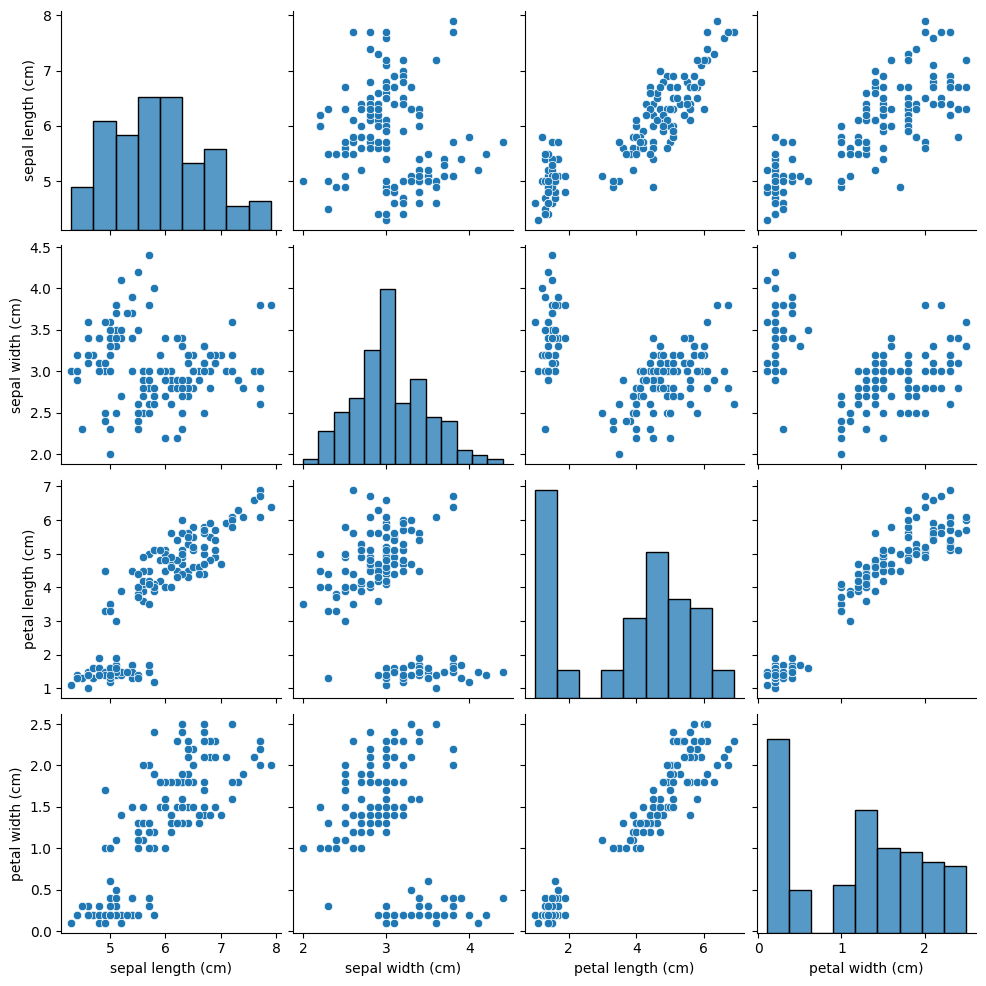

In [ ]:
# –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
sns.pairplot(X)
plt.show()

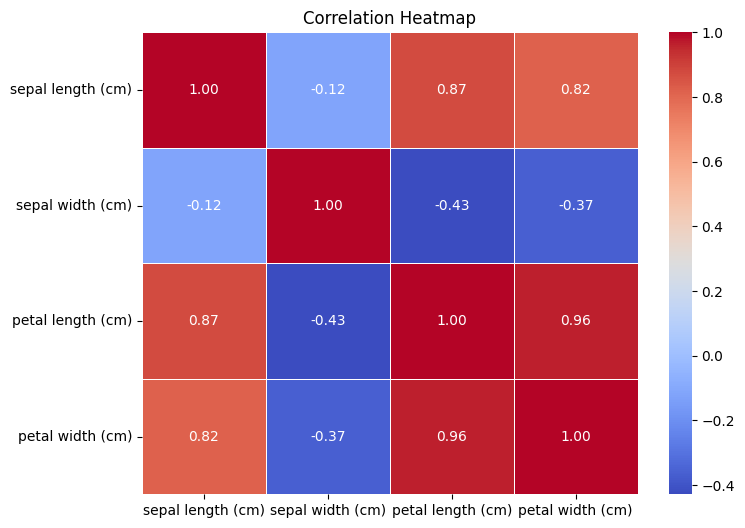

In [ ]:
# –ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

**–í—ã–≤–æ–¥**
–í –¥–∞–Ω–Ω—ã—Ö –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤—ã—Å–æ–∫–∞—è –ø—Ä—è–º–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —Å–ª–µ–¥—É—é—â–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏:


1.   sepal length (cm) –∏ petal width (cm)
2.   petal length (cm) –∏ petal width (cm)
3.   petal length (cm) –∏ sepal length (cm)



**–¶–µ–ª—å –¥–∞–Ω–Ω–æ–≥–æ –Ω–æ—É—Ç–±—É–∫–∞** —Å—Ä–∞–≤–Ω–∏—Ç—å –º–µ—Ç–æ–¥—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ SVM, logistic regression –∏ knn classification

–ü–æ —ç—Ç–æ–π –ø—Ä–∏—á–∏–Ω–µ –ø–µ—Ä–µ–π–¥—ë–º –∫ –∑–∞–¥–∞—á–µ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –±—É–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å —Ü–≤–µ—Ç–∫–∞ –∫ –≤–∏–¥—É versicolor –ø—Ä–æ—Ç–∏–≤ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫–æ –≤—Å–µ–º –ø—Ä–æ—á–∏–º –≤–∏–¥–∞–º.

–î–ª—è —ç—Ç–æ–≥–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä—É–π—Ç–µ –∑–∞–≤–∏—Å–∏–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Ç–∞–∫, —á—Ç–æ–±—ã —Ü–≤–µ—Ç–∫–∏ –≤–∏–¥–∞ versicolor –∏–º–µ–ª–∏ –º–µ—Ç–∫—É 1, –∞ –ø—Ä–æ—á–∏—Ö –≤–∏–¥–æ–≤ ‚Äì –º–µ—Ç–∫—É -1.

In [ ]:
# –ü–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∫–∞
y_bin = (data["target"] == 1).astype(int)

–ò–∑ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤—ã –≤—ã–±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ 2 –ø—Ä–∏–∑–Ω–∞–∫–∞, —á—Ç–æ–±—ã –º–æ–∂–Ω–æ –±—ã–ª–æ –Ω–∞–≥–ª—è–¥–Ω–æ –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞—Ç—å —Ä–∞–±–æ—Ç—É –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ (–æ—Ç—Ä–∏—Å–æ–≤–∞—Ç—å –∑–æ–Ω—ã –ø—Ä–∏–Ω—è—Ç–∏—è —Ä–µ—à–µ–Ω–∏—è –≤ –¥–≤—É–º–µ—Ä–Ω–æ–π –ø–ª–æ—Å–∫–æ—Å—Ç–∏)

- –ë—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –¥–≤—É–º—è –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏: sepal length (cm) –∏ sepal width (cm). –û—Ç–¥–µ–ª–∏–º –∏—Ö –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º.


- –î–∞–ª–µ–µ –†–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é, –¥–æ–ª—é —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –≤—ã–±–µ—Ä–µ–º  —Ä–∞–≤–Ω–æ–π 0.4.


- –¢–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫–∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ StandardScaler, —Ç–æ –µ—Å—Ç—å –ø—Ä–∏–≤–µ–¥–µ–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –∫ –∫ –¥–∞–Ω–Ω—ã–º —Å–æ —Å—Ä–µ–¥–Ω–∏–º = 0 –∏ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∏–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ–º = 1



In [ ]:
np.random.seed(123)

X = X[["sepal length (cm)", "sepal width (cm)"]]

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, train_size=0.6, stratify=y_bin)

# –û—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–π—Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
ss = StandardScaler() # (x-m)/sigma

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)


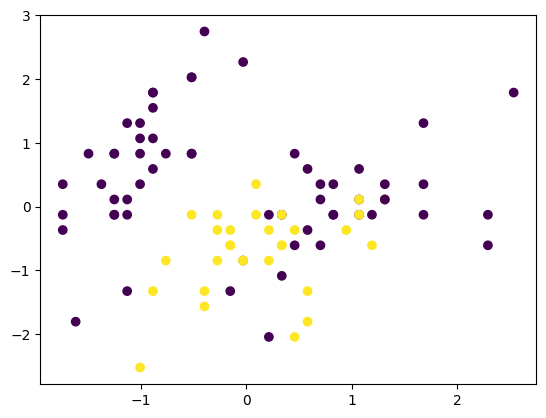

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

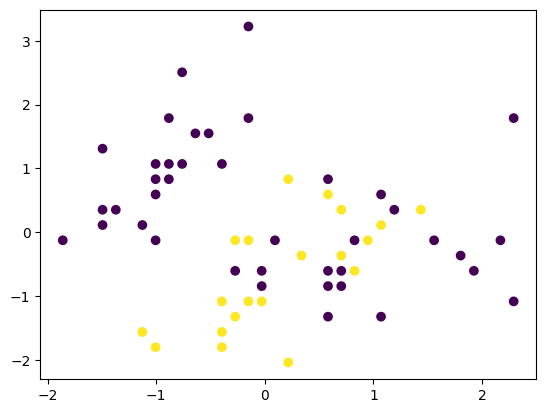

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test);

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤ —Ä–µ—à–∞—é—â–∏—Ö –æ–±–ª–∞—Å—Ç–µ–π
def plot_decision_boundary(model, X, y):
    # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–∞
    h = .02  # –®–∞–≥ —Å–µ—Ç–∫–∏
    cmap = plt.cm.RdYlBu
    markers = 's^o'  # –ú–∞—Ä–∫–µ—Ä—ã –¥–ª—è –∫–ª–∞—Å—Å–æ–≤

    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    model.fit(X, y)

    # –†–∞–∑–º–µ—Ä—ã –≥—Ä–∞—Ñ–∏–∫–∞
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ —Å–µ—Ç–∫–µ
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ–Ω—Ç—É—Ä–æ–≤
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    # –†–∞–∑–º–µ—Ç–∫–∞ –∫–ª–∞—Å—Å–æ–≤
    for i, c in zip(range(2), markers):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], marker=c, label=f"Class {i}")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions ({type(model).__name__})')
    plt.legend()
    plt.show()


In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –º–µ—Ç—Ä–∏–∫ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∫—Ä–∏–≤–æ–π ROC
def calculate_metrics_and_plot_roc(model, X_train, y_train, X_test, y_test):
    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    model.fit(X_train, y_train)

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ precision –∏ recall
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)

    print(f"Training Precision: {train_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}")
    print(f"Test Precision: {test_precision:.2f}")
    print(f"Test Recall: {test_recall:.2f}")

    metrics =  {'params': ['Training_Precision', 'Test_Precision','Training_Recall', 'Test_Recall'],
                'values': [train_precision, test_precision, train_recall, test_recall]}

    # –†–∞—Å—á–µ—Ç ROC-AUC –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
    try:
      pred_test = model.predict_proba(X_test)
      pred_train = model.predict_proba(X_train)
      roc_auc_test = roc_auc_score(y_test, pred_test[:, 1])
      roc_auc_train = roc_auc_score(y_train, pred_train[:, 1])
      print(f"ROC-AUC_test = : {roc_auc_test:.2f} –∏ ROC-AUC_train = : {roc_auc_train:.2f}")

      # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫—Ä–∏–≤–æ–π ROC
      fpr_test, tpr_test, _ = roc_curve(y_test, pred_test[:, 1])
      fpr_train, tpr_train, _ = roc_curve(y_train, pred_train[:, 1])
      plt.figure()
      plt.plot(fpr_test, tpr_test, color='blue', lw=2, label = 'ROC Curve test')
      plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label = 'ROC Curve test')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend()
      plt.title(f'ROC Curve ({type(model).__name__})')
      plt.show()
    except Exception as e:
      print(e)
    return metrics




##KNN

In [ ]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier()

In [ ]:
# –ø–æ–∏—Å–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é –ø–µ—Ä–µ–±–æ—Ä–∞
params = {'n_neighbors': [1, 3, 5, 7, 9]}

best_score = 0
# best_n_neighbors = 0

for k in params['n_neighbors']:
    knn_model.set_params(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score = avg_score
        best_n_neighbors = k

In [ ]:
best_n_neighbors

3

In [ ]:
# –ó–∞–¥–∞–µ–º —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∑–Ω–∞—á–µ–Ω–∏—è "n_neighbors", –∫–æ—Ç–æ—Ä–æ–µ –º—ã —Ö–æ—Ç–∏–º –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}  # –ü—Ä–∏–º–µ—Ä –∑–Ω–∞—á–µ–Ω–∏–π, –º–æ–∂–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å –¥–∏–∞–ø–∞–∑–æ–Ω –ø–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç GridSearchCV —Å –º–æ–¥–µ–ª—å—é KNN –∏ —Å–µ—Ç–∫–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
grid_search = GridSearchCV(knn_model, param_grid, cv=5)  # –ü–∞—Ä–∞–º–µ—Ç—Ä cv –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–æ–ª–¥–æ–≤ –≤ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
grid_search.fit(X_train, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à–µ–µ –Ω–∞–π–¥–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ "n_neighbors" –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
best_n_neighbors = grid_search.best_params_['n_neighbors']
print('best_n_neighbors =', best_n_neighbors)


best_n_neighbors = 3


In [ ]:
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)

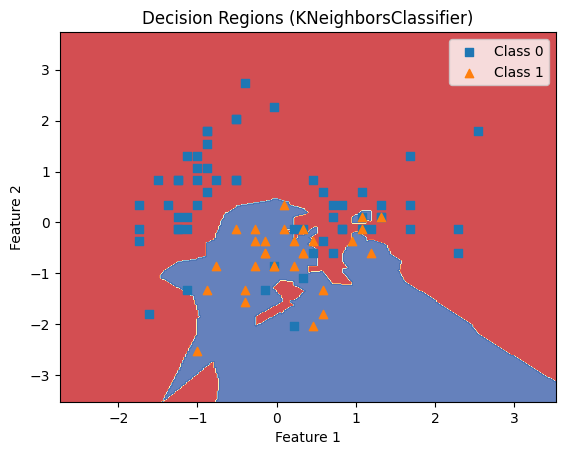

In [ ]:
plot_decision_boundary(best_knn_model, X_train, y_train)

Training Precision: 0.77
Training Recall: 0.80
Test Precision: 0.69
Test Recall: 0.55
ROC-AUC_test = : 0.78 –∏ ROC-AUC_train = : 0.93


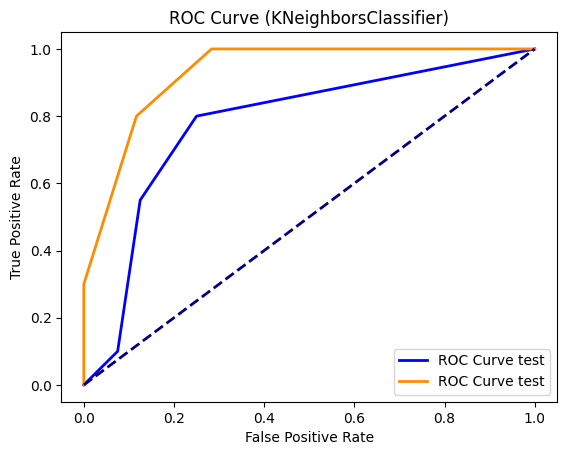

In [ ]:
metrics_knn = calculate_metrics_and_plot_roc(best_knn_model, X_train, y_train, X_test, y_test)

**–í—ã–≤–æ–¥**


k –±–ª–∏–∂–∞–π—â–∏—Ö —Å–æ—Å–µ–¥–µ–π —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∏–ª—Å—è, —ç—Ç–æ –≤–∏–¥–Ω–æ –∏ –ø–æ –≥—Ä–∞—Ñ–∏–∫—É ROC –∫—Ä–∏–≤–æ–π, –∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º ROC-AUC, Precision, Recall

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è C, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l2','l1',],
              'solver': ['liblinear','saga']
              }

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
logreg_model = LogisticRegression(max_iter = 100000)

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç GridSearchCV —Å –º–æ–¥–µ–ª—å—é –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ —Å–µ—Ç–∫–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
grid_search = GridSearchCV(logreg_model, param_grid, cv=5)  # cv —É–∫–∞–∑—ã–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–ª–æ–∫–æ–≤ –¥–ª—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
grid_search.fit(X_train, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ C, –Ω–∞–π–¥–µ–Ω–Ω–æ–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
# best_params = grid_search.best_params_[param_grid]
print('–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞:', grid_search.best_params_)


–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


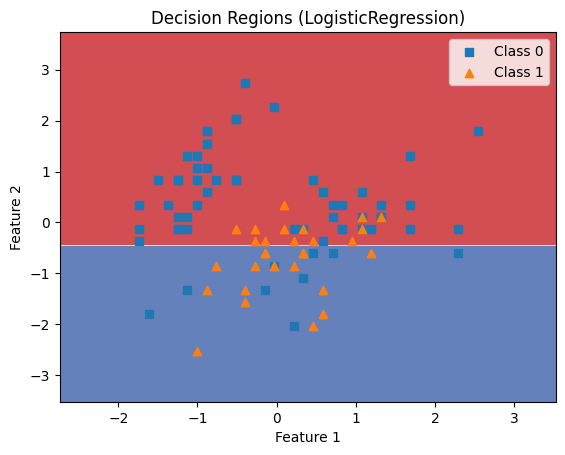

In [ ]:

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
logreg_model = LogisticRegression( max_iter=1000, **grid_search.best_params_)
plot_decision_boundary(logreg_model, X_train, y_train)

Training Precision: 0.65
Training Recall: 0.57
Test Precision: 0.48
Test Recall: 0.50
ROC-AUC_test = : 0.75 –∏ ROC-AUC_train = : 0.83


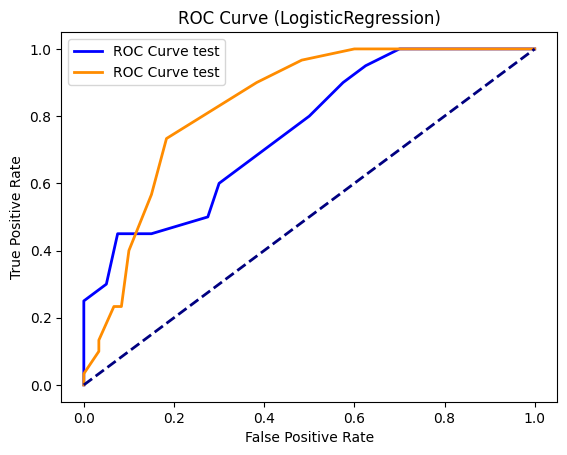

In [ ]:
metrics_logreg  = calculate_metrics_and_plot_roc(logreg_model, X_train, y_train, X_test, y_test)

**–í—ã–≤–æ–¥**

–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∞, –∑–∞–º–µ—Ç–∏–º, —á—Ç–æ  –º–µ–Ω—å—à–µ, —á–µ–º KNN.

–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, –º–æ–∂–µ—Ç –≤—Å–µ –∏–∑–º–µ–Ω–∏—Ç—Å—è? üòä

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è C, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l2','l1',],
              'solver': ['liblinear','saga']
              }
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.fit_transform(X_test)
# Fit Linear model with poly features
poly_model = LogisticRegression(max_iter = 100000)

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç GridSearchCV —Å –º–æ–¥–µ–ª—å—é –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ —Å–µ—Ç–∫–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
grid_search = GridSearchCV(poly_model, param_grid, cv=5)  # cv —É–∫–∞–∑—ã–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–ª–æ–∫–æ–≤ –¥–ª—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
grid_search.fit(X_train_poly, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ C, –Ω–∞–π–¥–µ–Ω–Ω–æ–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
print('–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞:', grid_search.best_params_)


–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
poly_model = LogisticRegression(max_iter = 100000, **grid_search.best_params_)
poly_model.fit(X_train_poly, y_train)


LogisticRegression(C=1, max_iter=100000, solver='liblinear')

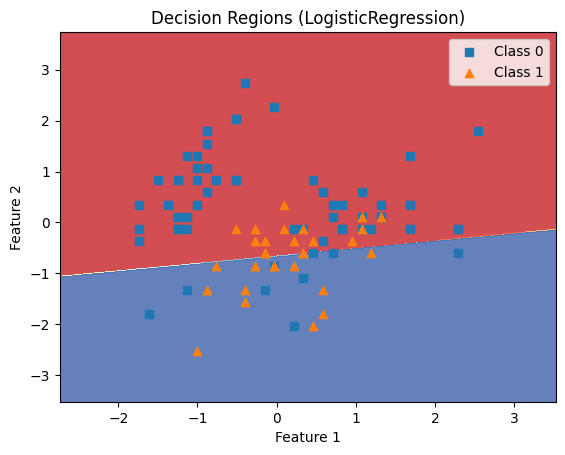

In [ ]:
plot_decision_boundary(poly_model, X_train, y_train)

Training Precision: 0.59
Training Recall: 0.43
Test Precision: 0.53
Test Recall: 0.50
ROC-AUC_test = : 0.76 –∏ ROC-AUC_train = : 0.83


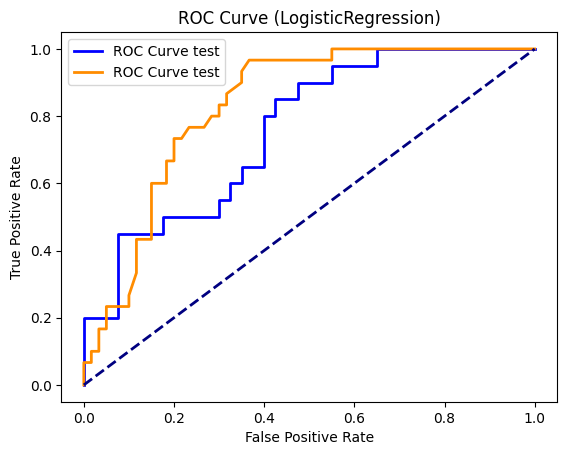

In [ ]:
metrics_poly_logreg  = calculate_metrics_and_plot_roc(poly_model, X_train, y_train, X_test, y_test)

**–í—ã–≤–æ–¥**

–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –Ω–µ –ø–æ–º–æ–≥–ª–∞ –Ω–∞–º, –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ —Å–æ—Ö—Ä–∞–Ω–∏–ª–æ—Å—å üò•

–ü–æ–ø—Ä–æ–±—É–µ–º SVM –¥–∞–ª—å—à–µ

In [ ]:
from sklearn.svm import SVC
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è C, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å
param_grid = {'C': [0.01, 0.1, 0.4, 0.5, 0.7, 0.8, 0.9, 1, 2, 3, 10, 100],
              }

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
svm_model = SVC(kernel='linear', C=0.0)

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç GridSearchCV —Å –º–æ–¥–µ–ª—å—é –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ —Å–µ—Ç–∫–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # cv —É–∫–∞–∑—ã–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–ª–æ–∫–æ–≤ –¥–ª—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
grid_search.fit(X_train, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ C, –Ω–∞–π–¥–µ–Ω–Ω–æ–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
# best_params = grid_search.best_params_[param_grid]
print('–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞:', grid_search.best_params_)


# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å –ª—É—á—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º C
best_svm_model = SVC(kernel='linear', **grid_search.best_params_)

–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: {'C': 0.7}


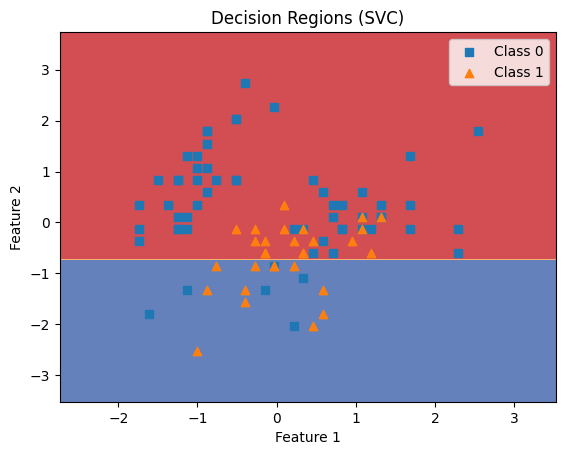

In [ ]:
plot_decision_boundary(best_svm_model, X_train, y_train)

In [ ]:
metrics_svm_linear  = calculate_metrics_and_plot_roc(best_svm_model, X_train, y_train, X_test, y_test)

Training Precision: 0.67
Training Recall: 0.40
Test Precision: 0.60
Test Recall: 0.45
predict_proba is not available when  probability=False


**–í—ã–≤–æ–¥**

–ü–æ –º–µ—Ç—Ä–∏–∫–∞–º –∫–∞—á–µ—Å—Ç–≤–∞ Precision –∏ Recall –≤–∏–¥–Ω–æ, —á—Ç–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ —É–º–µ–Ω—å—à–∏–ª–æ—Å—å, SVM –ª–∏–Ω–µ–π–Ω—ã–π –ø–æ–∫–∞ –≤—ã–∏–≥—Ä—ã–≤–∞–µ—Ç

–ú–æ–∂–µ—Ç –º—ã –µ—â–µ —Å–º–æ–∂–µ–º —É–ª—É—á—à–∏—Ç—å –º–æ–¥–µ–ª—å? –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–±–∞–≤–∏–º –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç–∏ –≤ SVM

In [ ]:
from sklearn.svm import SVC
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è C, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid',]
              }

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
svm_model = SVC(kernel='linear')

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç GridSearchCV —Å –º–æ–¥–µ–ª—å—é –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ —Å–µ—Ç–∫–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # cv —É–∫–∞–∑—ã–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–ª–æ–∫–æ–≤ –¥–ª—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
grid_search.fit(X_train, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ C, –Ω–∞–π–¥–µ–Ω–Ω–æ–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
# best_params = grid_search.best_params_[param_grid]
print('–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞:', grid_search.best_params_)


# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å –ª—É—á—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º C
best_svm_model = SVC(**grid_search.best_params_)

–õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: {'C': 1, 'kernel': 'rbf'}


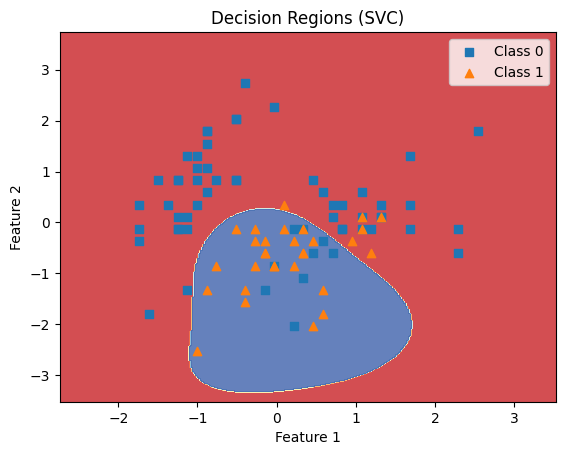

In [ ]:
plot_decision_boundary(best_svm_model, X_train, y_train)

In [ ]:
metrics_svm_not_linear  = calculate_metrics_and_plot_roc(best_svm_model, X_train, y_train, X_test, y_test)

Training Precision: 0.73
Training Recall: 0.80
Test Precision: 0.57
Test Recall: 0.65
predict_proba is not available when  probability=False


**–í—ã–≤–æ–¥**

–ù–µ—Ç, –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç–∏ –≤ SVM –Ω–µ –ø–æ–º–æ–≥–ª–æ, –Ω–∞–æ–±—Ä–æ—Ç —Ç–æ–ª—å–∫–æ –≤—Å–µ –∏—Å–ø–æ—Ä—Ç–∏–ª–æ.




**–°–æ–±–µ—Ä–µ–º –≤—Å–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É, —á—Ç–æ–±—ã –±—ã–ª–æ –ø—Ä–æ—â–µ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º—ã**

In [ ]:
metrics_svm_not_linear['metrics'] = ['metrics_svm_not_linear' for i in range(4)]

metrics_svm_linear['metrics'] = ['metrics_svm_linear' for i in range(4)]

metrics_poly_logreg['metrics'] = ['metrics_poly_logreg' for i in range(4)]

metrics_logreg['metrics'] = ['metrics_logreg' for i in range(4)]
metrics_knn['metrics'] = ['metrics_knn' for i in range(4)]

In [ ]:
df_stat = pd.concat([pd.DataFrame(metrics_svm_not_linear),
                    pd.DataFrame(metrics_svm_linear),
                    pd.DataFrame(metrics_poly_logreg),
                    pd.DataFrame(metrics_logreg),
                    pd.DataFrame(metrics_knn)])

In [ ]:
df_stat = df_stat.pivot_table(columns = 'params',
                            index='metrics',
                            values='values').reset_index()[['metrics','Test_Precision',	'Training_Precision',
                                                            'Test_Recall',	'Training_Recall']]
df_stat['dif_Precision'] = round((df_stat['Test_Precision'] - df_stat['Training_Precision'])/df_stat['Training_Precision'],2)

df_stat['dif_Recall'] = round((df_stat['Test_Recall'] - df_stat['Training_Recall'])/df_stat['Training_Recall'],2)
df_stat

params                 metrics  Test_Precision  Training_Precision  \
0                  metrics_knn        0.687500            0.774194   
1               metrics_logreg        0.476190            0.653846   
2          metrics_poly_logreg        0.526316            0.590909   
3           metrics_svm_linear        0.600000            0.666667   
4       metrics_svm_not_linear        0.565217            0.727273   

params  Test_Recall  Training_Recall  dif_Precision  dif_Recall  
0              0.55         0.800000          -0.11       -0.31  
1              0.50         0.566667          -0.27       -0.12  
2              0.50         0.433333          -0.11        0.15  
3              0.45         0.400000          -0.10        0.12  
4              0.65         0.800000          -0.22       -0.19


–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–º –∏ –Ω–µ–ø–µ—Ä–µ–æ–±—É—á–µ–Ω–Ω—ã–º –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –æ–∫–∞–∑–∞–ª—Å—è SVM –ª–∏–Ω–µ–π–Ω—ã–π, –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º dif_Precision –∏ dif_Recall –≤–∏–¥–Ω–æ, —á—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ –∏ —Ç–µ—Å—Ç–µ –Ω–∞–∏–º–µ–Ω—å—à–∞—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å–æ –≤—Å–µ–º–∏—Ç –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏